In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csqa-logicalcombinations/test_all_hf.json
/kaggle/input/csqa-logicalcombinations/dev_all_hf.json
/kaggle/input/csqa-logicalcombinations/test_logical_combinations_output.json
/kaggle/input/csqa-logicalcombinations/dev_logical_combinations_output.json
/kaggle/input/csqa-logicalcombinations/logical_combinations_output.json
/kaggle/input/csqa-logicalcombinations/train_logical_combinations_output.json
/kaggle/input/csqa-logicalcombinations/train_all_hf.json


In [2]:
# import pandas as pd
# import json

# # Load JSON
# with open("/kaggle/input/csqa-logicalcombinations/train_logical_combinations_output.json", "r") as f:
#     data = json.load(f)

# # Convert the 'questions' list to a DataFrame
# train_df = pd.DataFrame(data["questions"])
# train_df.to_csv('train_logical_combinations_output.csv',index=False)

# train_df.head()

# # Load JSON
# with open("/kaggle/input/csqa-logicalcombinations/dev_logical_combinations_output.json", "r") as f:
#     data = json.load(f)

# # Convert the 'questions' list to a DataFrame
# dev_df = pd.DataFrame(data["questions"])
# dev_df.to_csv('dev_logical_combinations_output.csv',index=False)

# dev_df.head()


# # Load JSON
# with open("/kaggle/input/csqa-logicalcombinations/test_logical_combinations_output.json", "r") as f:
#     data = json.load(f)

# # Convert the 'questions' list to a DataFrame
# test_df = pd.DataFrame(data["questions"])
# test_df.to_csv('test_logical_combinations_output.csv',index=False)

# test_df.head()

In [3]:
# train_df.head()

In [4]:
# import pandas as pd
# import random
# import ast

# # Load your dataset
# df = pd.read_csv("/kaggle/working/train_logical_combinations_output.csv")  # replace with your file

# # Safe eval to ensure lists are properly loaded
# def safe_eval(val):
#     if isinstance(val, list):
#         return val
#     if pd.isna(val):
#         return []
#     if isinstance(val, str):
#         try:
#             return ast.literal_eval(val)
#         except:
#             return []
#     return []

# df['logical_combinations'] = df['logical_combinations'].apply(safe_eval)

# # Prepare storage for QA sets
# qa_sets = {
#     'AND': [],
#     'OR': [],
#     'NEITHER': [],
#     'Mixed': []
# }

# # Label rotation - separate rotator for each question type
# class LabelRotator:
#     def __init__(self, name):
#         self.name = name
#         self.labels = ['A', 'B', 'C', 'D']
#         self.current_index = 0
    
#     def get_next_label(self):
#         label = self.labels[self.current_index]
#         self.current_index = (self.current_index + 1) % len(self.labels)
#         # print(f"DEBUG {self.name}: Assigned label {label}, next will be {self.labels[self.current_index]}")
#         return label

# # Create separate rotators for each question type
# rotators = {
#     'AND': LabelRotator('AND'),
#     'OR': LabelRotator('OR'),
#     'NEITHER': LabelRotator('NEITHER'),
#     'Mixed': LabelRotator('Mixed')
# }

# def create_qa_item(question, correct_ans, incorrect_ans, qa_type):
#     """Helper function to create a QA item with proper label rotation"""
    
#     # Get correct label from the appropriate rotator
#     correct_label = rotators[qa_type].get_next_label()
    
#     # Ensure we have exactly 3 incorrect answers
#     if len(incorrect_ans) < 3:
#         print(f"Warning: Only {len(incorrect_ans)} incorrect answers available for {qa_type}")
#         return None
    
#     selected_incorrect = random.sample(incorrect_ans, 3)
    
#     # Create options array with 4 positions
#     options = [''] * 4
    
#     # Place correct answer at the designated position
#     correct_pos = rotators[qa_type].labels.index(correct_label)
#     options[correct_pos] = correct_ans
    
#     # Fill remaining positions with incorrect answers
#     incorrect_positions = [i for i in range(4) if i != correct_pos]
#     for i, pos in enumerate(incorrect_positions):
#         options[pos] = selected_incorrect[i]
    
#     return {
#         'question': question,
#         'A': options[0],
#         'B': options[1],
#         'C': options[2],
#         'D': options[3],
#         'correct_label': correct_label,
#         'correct_answer_text': correct_ans,
#         'qa_type': qa_type
#     }

# # Track counts for each type
# type_counts = {'AND': 0, 'OR': 0, 'NEITHER': 0, 'Mixed': 0}

# for idx, row in df.iterrows():
#     question = row['question']
#     combos = row['logical_combinations']
    
#     # Extract AND/OR/NEITHER correct and incorrect lists
#     and_correct = combos.get('AND_combinations', {}).get('correct', [])
#     and_incorrect = combos.get('AND_combinations', {}).get('incorrect', [])
    
#     or_correct = combos.get('OR_combinations', {}).get('correct', [])
#     or_incorrect = combos.get('OR_combinations', {}).get('incorrect', [])
    
#     neither_correct = combos.get('NEITHER_combinations', {}).get('correct', [])
#     neither_incorrect = combos.get('NEITHER_combinations', {}).get('incorrect', [])
    
#     # --- AND-only QA ---
#     if and_correct and len(and_incorrect) >= 3:
#         correct_ans = random.choice(and_correct)
#         qa_item = create_qa_item(question, correct_ans, and_incorrect, 'AND')
#         if qa_item:
#             qa_sets['AND'].append(qa_item)
#             type_counts['AND'] += 1
#             # print(f"AND Question {type_counts['AND']}: Label {qa_item['correct_label']}")
    
#     # --- OR-only QA ---
#     if or_correct and len(or_incorrect) >= 3:
#         correct_ans = random.choice(or_correct)
#         qa_item = create_qa_item(question, correct_ans, or_incorrect, 'OR')
#         if qa_item:
#             qa_sets['OR'].append(qa_item)
#             type_counts['OR'] += 1
#             # print(f"OR Question {type_counts['OR']}: Label {qa_item['correct_label']}")
    
#     # --- NEITHER-only QA ---
#     if neither_correct and len(neither_incorrect) >= 3:
#         correct_ans = random.choice(neither_correct)
#         qa_item = create_qa_item(question, correct_ans, neither_incorrect, 'NEITHER')
#         if qa_item:
#             qa_sets['NEITHER'].append(qa_item)
#             type_counts['NEITHER'] += 1
#             # print(f"NEITHER Question {type_counts['NEITHER']}: Label {qa_item['correct_label']}")
    
#     # --- Mixed QA ---
#     all_correct_types = [
#         ('AND', and_correct),
#         ('OR', or_correct),
#         ('NEITHER', neither_correct)
#     ]
#     all_incorrect_types = and_incorrect + or_incorrect + neither_incorrect
    
#     # Ensure at least one correct exists and enough incorrect answers
#     valid_categories = [cat for cat, lst in all_correct_types if lst]
#     if valid_categories and len(all_incorrect_types) >= 3:
#         chosen_category = random.choice(valid_categories)
#         chosen_correct_list = dict(all_correct_types)[chosen_category]
#         correct_ans = random.choice(chosen_correct_list)
#         qa_item = create_qa_item(question, correct_ans, all_incorrect_types, 'Mixed')
#         if qa_item:
#             qa_sets['Mixed'].append(qa_item)
#             type_counts['Mixed'] += 1
#             # print(f"Mixed Question {type_counts['Mixed']}: Label {qa_item['correct_label']}")

# print(f"\n=== GENERATION COMPLETE ===")
# for qtype, count in type_counts.items():
#     print(f"{qtype}: {count} questions generated")

# # --- Convert to DataFrames and save ---
# for key, qlist in qa_sets.items():
#     if qlist:  # Only save if we have questions
#         df_out = pd.DataFrame(qlist)
#         df_out.to_csv(f'train_qa_{key}.csv', index=False)
#         print(f"\n{key} QA saved: {len(df_out)} questions in train_qa_{key}.csv")
        
#         # Show label distribution for verification
#         label_counts = df_out['correct_label'].value_counts().sort_index()
#         print(f"  Label distribution: {dict(label_counts)}")
        
#         # Show label sequence for first 8 questions to verify rotation
#         print(f"  Label sequence (first 8): {list(df_out['correct_label'].head(8))}")
#     else:
#         print(f"{key}: No valid QA pairs generated")

# # Overall statistics
# total_questions = sum(len(qlist) for qlist in qa_sets.values())
# print(f"\nFinal total questions generated: {total_questions}")

In [5]:
# train_qa_and  = pd.read_csv('/kaggle/working/test_qa_AND.csv')

# train_qa_and.head()

In [6]:
# train_qa_and.info()

In [7]:
# import pandas as pd

# and_df = pd.read_csv("train_qa_AND.csv")
# or_df = pd.read_csv("train_qa_OR.csv")
# neither_df = pd.read_csv("train_qa_NEITHER.csv")
# mixed_df = pd.read_csv("train_qa_Mixed.csv")

# train_df = pd.concat([and_df, or_df, neither_df, mixed_df], ignore_index=True)
# train_df.to_csv("train_all.csv", index=False)


# and_df = pd.read_csv("dev_qa_AND.csv")
# or_df = pd.read_csv("dev_qa_OR.csv")
# neither_df = pd.read_csv("dev_qa_NEITHER.csv")
# mixed_df = pd.read_csv("dev_qa_Mixed.csv")

# dev_df = pd.concat([and_df, or_df, neither_df, mixed_df], ignore_index=True)
# dev_df.to_csv("dev_all.csv", index=False)


# and_df = pd.read_csv("test_qa_AND.csv")
# or_df = pd.read_csv("test_qa_OR.csv")
# neither_df = pd.read_csv("test_qa_NEITHER.csv")
# mixed_df = pd.read_csv("test_qa_Mixed.csv")

# test_df = pd.concat([and_df, or_df, neither_df, mixed_df], ignore_index=True)
# test_df.to_csv("test_all.csv", index=False)


In [8]:
# label_map = {"A": 0, "B": 1, "C": 2, "D": 3}

# train_df["choices"] = train_df.apply(lambda r: [r["A"], r["B"], r["C"], r["D"]], axis=1)
# train_df["label"] = train_df["correct_label"].map(label_map)

# # Keep only columns needed
# hf_train_df = train_df[["question", "choices", "label", "qa_type"]]

# hf_train_df.to_json("train_all_hf.json", orient="records", lines=True)

# dev_df["choices"] = dev_df.apply(lambda r: [r["A"], r["B"], r["C"], r["D"]], axis=1)
# dev_df["label"] = dev_df["correct_label"].map(label_map)

# # Keep only columns needed
# hf_dev_df = dev_df[["question", "choices", "label","qa_type"]]

# hf_dev_df.to_json("dev_all_hf.json", orient="records", lines=True)


# test_df["choices"] = test_df.apply(lambda r: [r["A"], r["B"], r["C"], r["D"]], axis=1)
# test_df["label"] = test_df["correct_label"].map(label_map)

# # Keep only columns needed
# hf_test_df = test_df[["question", "choices", "label","qa_type"]]

# hf_test_df.to_json("test_all_hf.json", orient="records", lines=True)



In [9]:
# hf_train_df

In [10]:
# # Step 1: Clean uninstall everything
# !pip uninstall -y protobuf pyarrow google-protobuf datasets transformers accelerate bitsandbytes peft trl

# # Step 2: Install in the correct order with compatible versions
!pip install --upgrade --no-cache-dir protobuf==3.20.3
# !pip install --no-cache-dir pyarrow==12.0.1
# !pip install --no-cache-dir datasets==2.14.0
# !pip install --no-cache-dir transformers==4.35.2
# !pip install --no-cache-dir accelerate

# Step 3: Verify installation
import sys
print("Python version:", sys.version)

try:
    import pyarrow as pa
    print(f"✓ PyArrow {pa.__version__}")
except Exception as e:
    print(f"✗ PyArrow failed: {e}")

try:
    import datasets
    print(f"✓ Datasets {datasets.__version__}")
except Exception as e:
    print(f"✗ Datasets failed: {e}")

try:
    from transformers import __version__
    print(f"✓ Transformers {__version__}")
except Exception as e:
    print(f"✗ Transformers failed: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-me

In [11]:
# # Uninstall and reinstall datasets with matching pyarrow version
# !pip uninstall -y datasets  pyarrow
# !pip install --no-cache-dir pyarrow
# !pip install --no-cache-dir datasets

In [12]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 19.0.1
    Uninstalling pyarrow-19.0.1:
      Successfully uninstalled pyarrow-19.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
pylibcudf-cu12 25.2.2 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 22.0.0 which is incompatible.
cudf-cu12 25.2.2 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 22.0.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
cudf-polars-cu12 25.6.0 requires pylibcudf-cu12=

In [13]:
# from transformers import AutoTokenizer, AutoModelForMultipleChoice
# from transformers import TrainingArguments, Trainer, DataCollatorForMultipleChoice
# import torch
# from torch.utils.data import Dataset
# import json
# import evaluate

# # Load model
# model_name = "microsoft/deberta-v3-base"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForMultipleChoice.from_pretrained(model_name)
# model.gradient_checkpointing_enable()

# # Custom Dataset class to replace datasets.load_dataset
# import json

# class MCQADataset(Dataset):
#     def __init__(self, json_path, tokenizer, max_length=256):
#         self.data = []
#         with open(json_path, 'r') as f:
#             for line in f:
#                 self.data.append(json.loads(line.strip()))
#         self.tokenizer = tokenizer
#         self.max_length = max_length
    
#     def __len__(self):
#         return len(self.data)
    
#     def __getitem__(self, idx):
#         item = self.data[idx]
#         question = item["question"]
#         choices = item["choices"]
#         label = item["label"]
#         qa_type = item["qa_type"] 
        
#         tokenized = self.tokenizer(
#             [question] * 4,
#             choices,
#             padding="max_length",
#             truncation=True,
#             max_length=self.max_length,
#             return_tensors="pt"
#         )
        
#         return {
#             "input_ids": tokenized["input_ids"],
#             "attention_mask": tokenized["attention_mask"],
#             "labels": torch.tensor(label),
#             "qa_type": qa_type 
#         }

# # Load datasets
# train_dataset = MCQADataset("/kaggle/input/csqa-logicalcombinations/train_all_hf.json", tokenizer)
# eval_dataset = MCQADataset("/kaggle/input/csqa-logicalcombinations/dev_all_hf.json", tokenizer)

# data_collator = DataCollatorForMultipleChoice(tokenizer)

# # Rest of your code remains the same
# metric = evaluate.load("accuracy")

# def compute_metrics(p):
#     preds = p.predictions.argmax(-1)
#     return metric.compute(predictions=preds, references=p.label_ids)

# training_args = TrainingArguments(
#     output_dir="./deberta-v3-mcqa",
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     learning_rate=1e-5,
#     per_device_train_batch_size=2,
#     per_device_eval_batch_size=2,
#     gradient_accumulation_steps=4,
#     num_train_epochs=4,
#     weight_decay=0.01,
#     fp16=True,
#     load_best_model_at_end=True,
#     logging_steps=50,
#     remove_unused_columns=False,
# )

# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=eval_dataset,
#     tokenizer=tokenizer,
#     data_collator=data_collator,
#     compute_metrics=compute_metrics,
# )

# trainer.train()


Training Configuration:
  max_epochs: 10
  patience: 3
  min_delta: 0.001
  batch_size: 4
  learning_rate: 2e-05
  warmup_steps: 500
  gradient_accumulation_steps: 2
  weight_decay: 0.01
  max_length: 256


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

2025-11-16 21:39:45.042207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763329185.234915      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763329185.298458      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForMultipleChoice were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loaded 11996 examples from /kaggle/input/csqa-logicalcombinations/train_all_hf.json
Dataset composition:
  AND: 2999 (25.0%)
  Mixed: 2999 (25.0%)
  NEITHER: 2999 (25.0%)
  OR: 2999 (25.0%)
Loaded 6000 examples from /kaggle/input/csqa-logicalcombinations/dev_all_hf.json
Dataset composition:
  AND: 1500 (25.0%)
  Mixed: 1500 (25.0%)
  NEITHER: 1500 (25.0%)
  OR: 1500 (25.0%)

Device: cuda
GPU: Tesla P100-PCIE-16GB

Training roberta-base with Early Stopping
Max Epochs: 10, Patience: 3

Epoch 1/10


Training:   0%|          | 0/2999 [00:00<?, ?it/s]


Train Loss: 1.3895

Evaluating...


Evaluating:   0%|          | 0/1500 [00:00<?, ?it/s]


Model: roberta-base | Epoch 1

Type         Accuracy     Macro-P      Macro-R      Macro-F1     Support   
----------------------------------------------------------------------------------------------------
AND              0.3600     0.3597     0.3600     0.3596     1500
Mixed            0.2527     0.2528     0.2527     0.2527     1500
NEITHER          0.2113     0.2121     0.2113     0.2114     1500
OR               0.3727     0.3724     0.3727     0.3725     1500
----------------------------------------------------------------------------------------------------
Macro Avg        0.2992     0.2992     0.2992     0.2991        -
Micro Avg        0.2992     0.2992     0.2992     0.2992     6000

  New best Macro F1: 0.2991 (↑0.2991)! Saving to ./roberta-base-best

Epoch 2/10


Training:   0%|          | 0/2999 [00:00<?, ?it/s]


Train Loss: 1.3886

Evaluating...


Evaluating:   0%|          | 0/1500 [00:00<?, ?it/s]


Model: roberta-base | Epoch 2

Type         Accuracy     Macro-P      Macro-R      Macro-F1     Support   
----------------------------------------------------------------------------------------------------
AND              0.3933     0.3942     0.3933     0.3934     1500
Mixed            0.2360     0.2362     0.2360     0.2361     1500
NEITHER          0.1840     0.1844     0.1840     0.1841     1500
OR               0.4167     0.4164     0.4167     0.4165     1500
----------------------------------------------------------------------------------------------------
Macro Avg        0.3075     0.3078     0.3075     0.3075        -
Micro Avg        0.3075     0.3075     0.3075     0.3075     6000

  New best Macro F1: 0.3075 (↑0.0084)! Saving to ./roberta-base-best

Epoch 3/10


Training:   0%|          | 0/2999 [00:00<?, ?it/s]


Train Loss: 1.3883

Evaluating...


Evaluating:   0%|          | 0/1500 [00:00<?, ?it/s]


Model: roberta-base | Epoch 3

Type         Accuracy     Macro-P      Macro-R      Macro-F1     Support   
----------------------------------------------------------------------------------------------------
AND              0.3773     0.3775     0.3773     0.3774     1500
Mixed            0.3473     0.3472     0.3473     0.3471     1500
NEITHER          0.1700     0.1703     0.1700     0.1700     1500
OR               0.3627     0.3633     0.3627     0.3627     1500
----------------------------------------------------------------------------------------------------
Macro Avg        0.3143     0.3146     0.3143     0.3143        -
Micro Avg        0.3143     0.3143     0.3143     0.3143     6000

  New best Macro F1: 0.3143 (↑0.0068)! Saving to ./roberta-base-best

Epoch 4/10


Training:   0%|          | 0/2999 [00:00<?, ?it/s]


Train Loss: 1.3895

Evaluating...


Evaluating:   0%|          | 0/1500 [00:00<?, ?it/s]


Model: roberta-base | Epoch 4

Type         Accuracy     Macro-P      Macro-R      Macro-F1     Support   
----------------------------------------------------------------------------------------------------
AND              0.1867     0.1871     0.1867     0.1868     1500
Mixed            0.2247     0.2244     0.2247     0.2244     1500
NEITHER          0.3627     0.3630     0.3627     0.3628     1500
OR               0.2493     0.2493     0.2493     0.2492     1500
----------------------------------------------------------------------------------------------------
Macro Avg        0.2558     0.2559     0.2558     0.2558        -
Micro Avg        0.2558     0.2558     0.2558     0.2558     6000

   No improvement for 1 epoch(s) (current: 0.2558, best: 0.3143)

Epoch 5/10


Training:   0%|          | 0/2999 [00:00<?, ?it/s]


Train Loss: 1.3888

Evaluating...


Evaluating:   0%|          | 0/1500 [00:00<?, ?it/s]


Model: roberta-base | Epoch 5

Type         Accuracy     Macro-P      Macro-R      Macro-F1     Support   
----------------------------------------------------------------------------------------------------
AND              0.2167     0.2170     0.2167     0.2167     1500
Mixed            0.2207     0.2212     0.2207     0.2208     1500
NEITHER          0.3420     0.3426     0.3420     0.3420     1500
OR               0.2607     0.2608     0.2607     0.2604     1500
----------------------------------------------------------------------------------------------------
Macro Avg        0.2600     0.2604     0.2600     0.2600        -
Micro Avg        0.2600     0.2600     0.2600     0.2600     6000

   No improvement for 2 epoch(s) (current: 0.2600, best: 0.3143)

Epoch 6/10


Training:   0%|          | 0/2999 [00:00<?, ?it/s]


Train Loss: 1.3893

Evaluating...


Evaluating:   0%|          | 0/1500 [00:00<?, ?it/s]


Model: roberta-base | Epoch 6

Type         Accuracy     Macro-P      Macro-R      Macro-F1     Support   
----------------------------------------------------------------------------------------------------
AND              0.2007     0.2008     0.2007     0.2007     1500
Mixed            0.2253     0.2249     0.2253     0.2251     1500
NEITHER          0.3500     0.3502     0.3500     0.3499     1500
OR               0.2500     0.2501     0.2500     0.2499     1500
----------------------------------------------------------------------------------------------------
Macro Avg        0.2565     0.2565     0.2565     0.2564        -
Micro Avg        0.2565     0.2565     0.2565     0.2565     6000

   No improvement for 3 epoch(s) (current: 0.2564, best: 0.3143)

Early stopping triggered!
Best Macro F1: 0.3143 at epoch 3
Training stopped at epoch 6

Training Complete!
Model: roberta-base
Best Epoch: 3/6
Best Macro F1: 0.3143
Best Validation Macro F1: 0.3143
Best Validation Macro Accurac

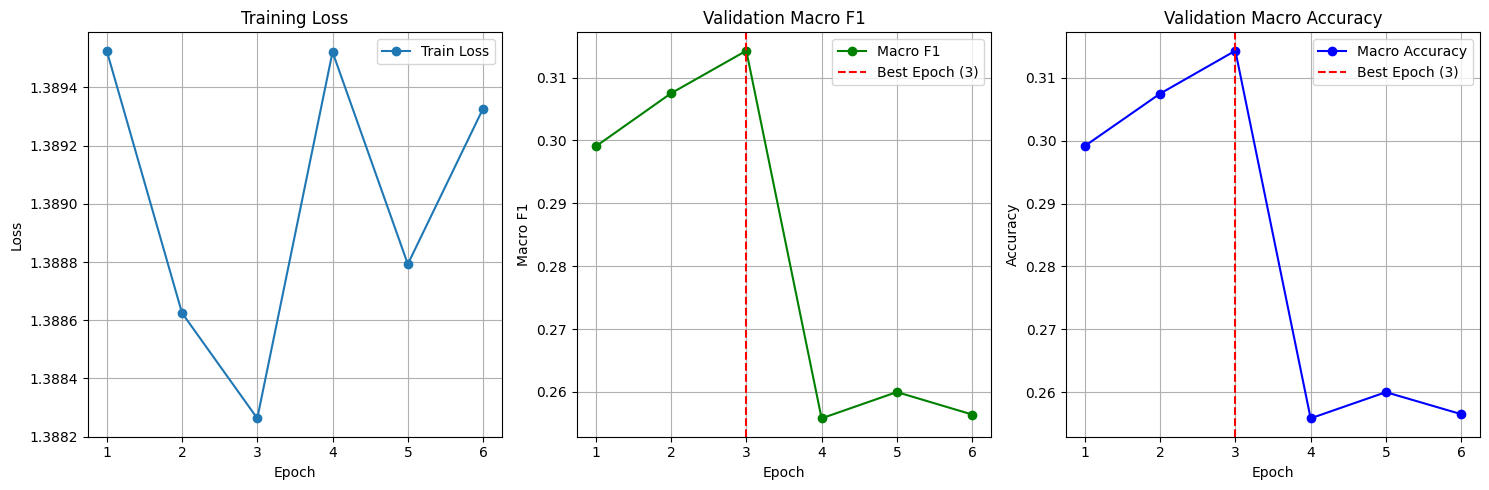

In [14]:
from transformers import AutoTokenizer, AutoModelForMultipleChoice, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader
import torch
from torch.optim import AdamW
from tqdm.auto import tqdm
import json
from collections import defaultdict
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load model
model_name = "roberta-base"

training_config = {
    'max_epochs': 10,
    'patience': 3,  # Early stopping patience
    'min_delta': 0.001,  # Minimum improvement to count
    'batch_size': 4,
    'learning_rate': 2e-5,
    'warmup_steps': 500,
    'gradient_accumulation_steps': 2,
    'weight_decay': 0.01,
    'max_length': 256
}

print("\nTraining Configuration:")
for key, value in training_config.items():
    print(f"  {key}: {value}")


tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMultipleChoice.from_pretrained(model_name)

# Custom Dataset
class MCQADataset(Dataset):
    def __init__(self, json_path, tokenizer, max_length=256):
        self.data = []
        with open(json_path, 'r') as f:
            for line in f:
                if line.strip():
                    self.data.append(json.loads(line.strip()))
        self.tokenizer = tokenizer
        self.max_length = max_length
        print(f"Loaded {len(self.data)} examples from {json_path}")
        
        # Print dataset statistics
        type_counts = defaultdict(int)
        for item in self.data:
            type_counts[item.get("qa_type", "unknown")] += 1
        print("Dataset composition:")
        for qa_type, count in sorted(type_counts.items()):
            print(f"  {qa_type}: {count} ({count/len(self.data)*100:.1f}%)")
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        item = self.data[idx]
        question = item["question"]
        choices = item["choices"]
        label = item["label"]
        qa_type = item.get("qa_type", "unknown")
        
        tokenized = self.tokenizer(
            [question] * 4,
            choices,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )
        
        return {
            "input_ids": tokenized["input_ids"],
            "attention_mask": tokenized["attention_mask"],
            "labels": torch.tensor(label),
            "qa_type": qa_type
        }

def compute_metrics_by_type(predictions, labels, qa_types):
    """
    Compute comprehensive metrics for dataset paper
    Returns per-type metrics with BOTH micro and macro averaging
    """
    predictions = np.array(predictions)
    labels = np.array(labels)
    qa_types = np.array(qa_types)
    
    unique_types = sorted([t for t in set(qa_types) if t != 'overall'])
    
    results = {
        'per_type': {},
        'macro_across_types': {},
        'micro_overall': {},
        'confusion_matrices': {}
    }
    
    # Per-type metrics (with both micro and macro within type)
    for qa_type in unique_types:
        mask = qa_types == qa_type
        type_preds = predictions[mask]
        type_labels = labels[mask]
        
        if len(type_preds) == 0:
            continue
        
        # MACRO: Average metrics across the 4 answer choices for this type
        macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(
            type_labels, type_preds, average='macro', zero_division=0, labels=[0, 1, 2, 3]
        )
        
        # MICRO: Global metrics for this type (same as accuracy)
        micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
            type_labels, type_preds, average='micro', zero_division=0, labels=[0, 1, 2, 3]
        )
        
        # Per-class metrics for this type (for detailed analysis)
        per_class_precision, per_class_recall, per_class_f1, per_class_support = precision_recall_fscore_support(
            type_labels, type_preds, average=None, zero_division=0, labels=[0, 1, 2, 3]
        )
        
        accuracy = (type_preds == type_labels).mean()
        
        results['per_type'][qa_type] = {
            # Macro metrics (average across 4 answer choices)
            'macro': {
                'precision': macro_precision,
                'recall': macro_recall,
                'f1': macro_f1,
            },
            # Micro metrics (global for this type)
            'micro': {
                'precision': micro_precision,  # same as accuracy
                'recall': micro_recall,        # same as accuracy
                'f1': micro_f1,                # same as accuracy
                'accuracy': accuracy,
            },
            # Per-answer-choice metrics
            'per_choice': {
                f'choice_{i}': {
                    'precision': per_class_precision[i],
                    'recall': per_class_recall[i],
                    'f1': per_class_f1[i],
                    'support': per_class_support[i]
                } for i in range(4)
            },
            'support': len(type_preds),
            'correct': (type_preds == type_labels).sum()
        }
        
        # Confusion matrix for this type
        results['confusion_matrices'][qa_type] = confusion_matrix(
            type_labels, type_preds, labels=[0, 1, 2, 3]
        )
    
    # Macro metrics across logical types (what you typically report in paper)
    macro_across_types_precision = np.mean([results['per_type'][t]['macro']['precision'] for t in unique_types])
    macro_across_types_recall = np.mean([results['per_type'][t]['macro']['recall'] for t in unique_types])
    macro_across_types_f1 = np.mean([results['per_type'][t]['macro']['f1'] for t in unique_types])
    macro_across_types_accuracy = np.mean([results['per_type'][t]['micro']['accuracy'] for t in unique_types])
    
    results['macro_across_types'] = {
        'precision': macro_across_types_precision,
        'recall': macro_across_types_recall,
        'f1': macro_across_types_f1,
        'accuracy': macro_across_types_accuracy
    }
    
    # Micro metrics overall (global across all instances)
    micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
        labels, predictions, average='micro', zero_division=0, labels=[0, 1, 2, 3]
    )
    micro_accuracy = (predictions == labels).mean()
    
    results['micro_overall'] = {
        'accuracy': micro_accuracy,
        'precision': micro_precision,
        'recall': micro_recall,
        'f1': micro_f1,
        'support': len(predictions),
        'correct': (predictions == labels).sum()
    }
    
    return results

def evaluate_comprehensive(model, dataloader, device):
    """Comprehensive evaluation with all metrics"""
    model.eval()
    
    all_predictions = []
    all_labels = []
    all_types = []
    
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)
            qa_types = batch["qa_type"]
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            predictions = outputs.logits.argmax(dim=-1)
            
            all_predictions.extend(predictions.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())
            all_types.extend(qa_types)
    
    metrics = compute_metrics_by_type(all_predictions, all_labels, all_types)
    return metrics

def print_results_table(metrics, epoch=None, model_name=None):
    """Print results table"""
    
    if epoch is not None:
        print(f"\n{'='*100}")
        if model_name:
            print(f"Model: {model_name} | Epoch {epoch}")
        print(f"{'='*100}")
    
    print(f"\n{'Type':<12} {'Accuracy':<12} {'Macro-P':<12} {'Macro-R':<12} {'Macro-F1':<12} {'Support':<10}")
    print("-" * 100)
    
    for qa_type in sorted(metrics['per_type'].keys()):
        m_macro = metrics['per_type'][qa_type]['macro']
        m_micro = metrics['per_type'][qa_type]['micro']
        support = metrics['per_type'][qa_type]['support']
        
        print(f"{qa_type:<12} {m_micro['accuracy']:>10.4f} {m_macro['precision']:>10.4f} "
              f"{m_macro['recall']:>10.4f} {m_macro['f1']:>10.4f} {support:>8}")
    
    print("-" * 100)
    
    m = metrics['macro_across_types']
    print(f"{'Macro Avg':<12} {m['accuracy']:>10.4f} {m['precision']:>10.4f} "
          f"{m['recall']:>10.4f} {m['f1']:>10.4f} {'-':>8}")
    
    m = metrics['micro_overall']
    print(f"{'Micro Avg':<12} {m['accuracy']:>10.4f} {m['precision']:>10.4f} "
          f"{m['recall']:>10.4f} {m['f1']:>10.4f} {m['support']:>8}")
    
    print("=" * 100)

# Load datasets
train_dataset = MCQADataset("/kaggle/input/csqa-logicalcombinations/train_all_hf.json", 
                           tokenizer, max_length=256)
eval_dataset = MCQADataset("/kaggle/input/csqa-logicalcombinations/dev_all_hf.json", 
                          tokenizer, max_length=256)

# Setup data loaders
batch_size = training_config['batch_size']
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size)

# Setup model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nDevice: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
model.to(device)

# Setup optimizer and scheduler
optimizer = AdamW(model.parameters(), 
                 lr=training_config['learning_rate'], 
                 weight_decay=training_config['weight_decay'])
num_training_steps = training_config['max_epochs'] * len(train_loader) // training_config['gradient_accumulation_steps']
lr_scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=training_config['warmup_steps'],
    num_training_steps=num_training_steps
)
# Training loop with early stopping
best_macro_f1 = 0
best_epoch = 0
epochs_without_improvement = 0
best_metrics = None
training_history = []

print(f"\n{'='*100}")
print(f"Training {model_name} with Early Stopping")
print(f"Max Epochs: {training_config['max_epochs']}, Patience: {training_config['patience']}")
print(f"{'='*100}")

for epoch in range(training_config['max_epochs']):
    print(f"\n{'='*100}")
    print(f"Epoch {epoch + 1}/{training_config['max_epochs']}")
    print(f"{'='*100}")
    
    # Training
    model.train()
    total_loss = 0
    optimizer.zero_grad()
    
    progress_bar = tqdm(train_loader, desc="Training")
    for step, batch in enumerate(progress_bar):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        
        # Forward pass (no mixed precision for P100)
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        loss = outputs.loss / training_config['gradient_accumulation_steps']
        
        loss.backward()
        
        # Gradient accumulation
        if (step + 1) % training_config['gradient_accumulation_steps'] == 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            lr_scheduler.step()
            optimizer.zero_grad()
        
        total_loss += loss.item() * training_config['gradient_accumulation_steps']
        progress_bar.set_postfix({"loss": f"{total_loss / (step + 1):.4f}"})
    
    avg_train_loss = total_loss / len(train_loader)
    print(f"\nTrain Loss: {avg_train_loss:.4f}")
    
    # Evaluation
    print("\nEvaluating...")
    metrics = evaluate_comprehensive(model, eval_loader, device)
    print_results_table(metrics, epoch=epoch + 1, model_name=model_name)
    
    macro_f1 = metrics['macro_across_types']['f1']
    macro_acc = metrics['macro_across_types']['accuracy']
    
    # Save history
    training_history.append({
        'epoch': epoch + 1,
        'train_loss': avg_train_loss,
        'macro_f1': macro_f1,
        'macro_accuracy': macro_acc,
        'macro_precision': metrics['macro_across_types']['precision'],
        'macro_recall': metrics['macro_across_types']['recall']
    })
    
    # Early stopping check
    improvement = macro_f1 - best_macro_f1
    
    if improvement > training_config['min_delta']:
        best_macro_f1 = macro_f1
        best_epoch = epoch + 1
        best_metrics = metrics
        epochs_without_improvement = 0
        
        save_dir = f"./{model_name.replace('/', '-')}-best"
        print(f"\n  New best Macro F1: {macro_f1:.4f} (↑{improvement:.4f})! Saving to {save_dir}")
        model.save_pretrained(save_dir)
        tokenizer.save_pretrained(save_dir)
        
        def convert_to_serializable(obj):
            if isinstance(obj, dict):
                return {k: convert_to_serializable(v) for k, v in obj.items()}
            elif isinstance(obj, (np.integer, np.floating)):
                return float(obj)
            elif isinstance(obj, np.ndarray):
                return obj.tolist()
            return obj
        
        results_for_paper = {
            'model': model_name,
            'best_epoch': best_epoch,
            'training_config': training_config,
            'training_history': training_history,
            'best_metrics': convert_to_serializable(best_metrics)
        }
        
        with open(f"{save_dir}/results_detailed.json", "w") as f:
            json.dump(results_for_paper, f, indent=2)
    else:
        epochs_without_improvement += 1
        print(f"\n   No improvement for {epochs_without_improvement} epoch(s) "
              f"(current: {macro_f1:.4f}, best: {best_macro_f1:.4f})")
    
    # Early stopping
    if epochs_without_improvement >= training_config['patience']:
        print(f"\n{'='*100}")
        print(f"Early stopping triggered!")
        print(f"Best Macro F1: {best_macro_f1:.4f} at epoch {best_epoch}")
        print(f"Training stopped at epoch {epoch + 1}")
        print(f"{'='*100}")
        break

# Final summary
print(f"\n{'='*100}")
print("Training Complete!")
print(f"{'='*100}")
print(f"Model: {model_name}")
print(f"Best Epoch: {best_epoch}/{epoch + 1}")
print(f"Best Macro F1: {best_macro_f1:.4f}")
print(f"{'='*100}")

if best_metrics is not None:
    print(f"Best Validation Macro F1: {best_macro_f1:.4f}")
    print(f"Best Validation Macro Accuracy: {best_metrics['macro_across_types']['accuracy']:.4f}")
else:
    print("Best Validation Macro F1: n/a (no improvement over initial baseline)")
    print("Best Validation Macro Accuracy: n/a")


# Plot training curves
plt.figure(figsize=(15, 5))

epochs_list = [h['epoch'] for h in training_history]

plt.subplot(1, 3, 1)
plt.plot(epochs_list, [h['train_loss'] for h in training_history], marker='o', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs_list, [h['macro_f1'] for h in training_history], marker='o', color='green', label='Macro F1')
plt.axvline(x=best_epoch, color='red', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.xlabel('Epoch')
plt.ylabel('Macro F1')
plt.title('Validation Macro F1')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(epochs_list, [h['macro_accuracy'] for h in training_history], marker='o', color='blue', label='Macro Accuracy')
plt.axvline(x=best_epoch, color='red', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Macro Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig(f'{model_name.replace("/", "-")}_training_curves.png', dpi=300, bbox_inches='tight')
print(f"\n  Saved training curves to {model_name.replace('/', '-')}_training_curves.png")

# Summary table for paper
print("\n" + "="*100)
print("SUMMARY FOR PAPER:")
print("="*100)
print(f"Model: {model_name}")
print(f"Best Epoch: {best_epoch}")
print(f"Total Epochs Trained: {len(training_history)}")
print(f"Converged: {'Yes (early stopping)' if epochs_without_improvement >= training_config['patience'] else 'No (completed all epochs)'}")
print(f"Best Validation Macro F1: {best_macro_f1:.4f}")
print(f"Best Validation Macro Accuracy: {best_metrics['macro_across_types']['accuracy']:.4f}")
print("="*100)